In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("house_prices.csv")

# -------------------------------
# 1 Select Features for Clustering
# -------------------------------
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 2 Apply K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:

# Show cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("=== Cluster Centers (Scaled Values) ===")
print(centroids, "\n")


=== Cluster Centers (Scaled Values) ===
   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt   LotArea
0    -0.564568  -0.569499   -0.522977    -0.391354   0.071693 -0.310823
1     1.040984   1.124837    1.197342     0.908739   0.563569  0.774001
2    -0.331061  -0.651687   -1.297121    -1.024825  -2.914944 -1.036035 



In [4]:
# 3 PCA for 2D Visualization
# -------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]


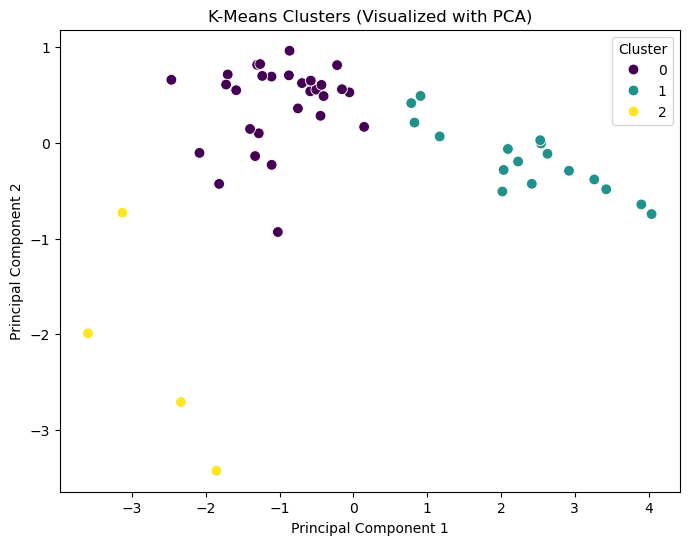

In [5]:
# 4️⃣ Plot the Clusters
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="viridis", s=60)
plt.title("K-Means Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [6]:
# 5 Analyze Cluster Patterns
# -------------------------------
cluster_summary = df.groupby("Cluster")[features + ["SalePrice"]].mean().round(2)
print("=== Cluster Summary (Average Feature Values) ===")
print(cluster_summary, "\n")

=== Cluster Summary (Average Feature Values) ===
         OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt   LotArea  \
Cluster                                                                         
0               6.52    1771.17        1.97      1053.14    1997.17   9710.31   
1               8.12    2449.88        3.00      1367.94    2007.00  11718.24   
2               6.75    1738.25        1.50       899.75    1937.50   8368.00   

         SalePrice  
Cluster             
0        212879.31  
1        304705.88  
2        146975.00   



In [7]:
# Summary
# -------------------------------
print("""
Week 8 Completed
- Applied K-Means clustering (3 clusters)
- Reduced dimensions using PCA for 2D visualization
- Found feature patterns across clusters
- Ready to include unsupervised analysis in final report
""")


Week 8 Completed
- Applied K-Means clustering (3 clusters)
- Reduced dimensions using PCA for 2D visualization
- Found feature patterns across clusters
- Ready to include unsupervised analysis in final report

